<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.273290  95.388095  38.148032 -0.019966  195.789450   
      1.0    40.808431  73.089285  25.322121  0.004107  149.223944   
      2.0    81.247215  43.770084  51.193309  0.020162  186.230769   
      3.0    48.174582  37.394798  52.319453  0.012317  147.901149   
      4.0    69.682773  68.067543  31.713100 -0.016905  179.446511   
...                ...        ...        ...       ...         ...   
999.0 245.0  87.947545  70.591939  46.287091 -0.012949  214.813627   
      246.0  54.522689  69.947891  28.941198 -0.003658  163.408119   
      247.0  61.554307  88.496095  92.760693 -0.010110  252.800985   
      248.0  70.457221  65.033459  93.102270 -0.014868  238.578083   
      249.0  83.215140  56.660685  33.535211 -0.013118  183.397918   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.809196 -0.019745  
      1.0    149.221162  0.002781  
      2.0    186.207212  0.023557  
      3.0    147.887886  0.013263  
      4.0    179.462134 -0.015624  
...                 ...       ...  
999.0 245.0  214.825015 -0.011388  
      246.0  163.410744 -0.002624  
      247.0  252.808991 -0.008005  
      248.0  238.588523 -0.010440  
      249.0  183.408636 -0.010718  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.273290  95.388095  38.148032 -0.019966  195.789450   
      1.0    40.808431  73.089285  25.322121  0.004107  149.223944   
      2.0    81.247215  43.770084  51.193309  0.020162  186.230769   
      3.0    48.174582  37.394798  52.319453  0.012317  147.901149   
      4.0    69.682773  68.067543  31.713100 -0.016905  179.446511   
...                ...        ...        ...       ...         ...   
999.0 245.0  87.947545  70.591939  46.287091 -0.012949  214.813627   
      246.0  54.522689  69.947891  28.941198 -0.003658  163.408119   
      247.0  61.554307  88.496095  92.760693 -0.010110  252.800985   
      248.0  70.457221  65.033459  93.102270 -0.014868  238.578083   
      249.0  83.215140  56.660685  33.535211 -0.013118  183.397918   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.809196 -0.019745  
      1.0    149.221162  0.002781  
      2.0    186.207212  0.023557  
      3.0    147.887886  0.013263  
      4.0    179.462134 -0.015624  
...                 ...       ...  
999.0 245.0  214.825015 -0.011388  
      246.0  163.410744 -0.002624  
      247.0  252.808991 -0.008005  
      248.0  238.588523 -0.010440  
      249.0  183.408636 -0.010718  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.273290  95.388095  38.148032 -0.019966  195.789450   
      1.0    40.808431  73.089285  25.322121  0.004107  149.223944   
      2.0    81.247215  43.770084  51.193309  0.020162  186.230769   
      3.0    48.174582  37.394798  52.319453  0.012317  147.901149   
      4.0    69.682773  68.067543  31.713100 -0.016905  179.446511   
...                ...        ...        ...       ...         ...   
999.0 245.0  87.947545  70.591939  46.287091 -0.012949  214.813627   
      246.0  54.522689  69.947891  28.941198 -0.003658  163.408119   
      247.0  61.554307  88.496095  92.760693 -0.010110  252.800985   
      248.0  70.457221  65.033459  93.102270 -0.014868  238.578083   
      249.0  83.215140  56.660685  33.535211 -0.013118  183.397918   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.809196 -0.019745  
      1.0    149.221162  0.002781  
      2.0    186.207212  0.023557  
      3.0    147.887886  0.013263  
      4.0    179.462134 -0.015624  
...                 ...       ...  
999.0 245.0  214.825015 -0.011388  
      246.0  163.410744 -0.002624  
      247.0  252.808991 -0.008005  
      248.0  238.588523 -0.010440  
      249.0  183.408636 -0.010718  

[250000 rows x 7 columns]

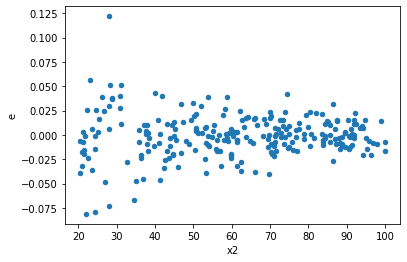

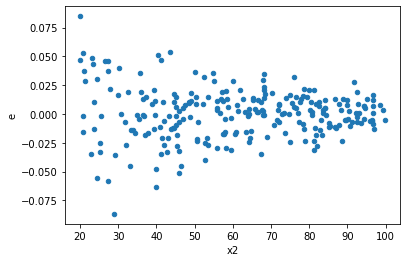

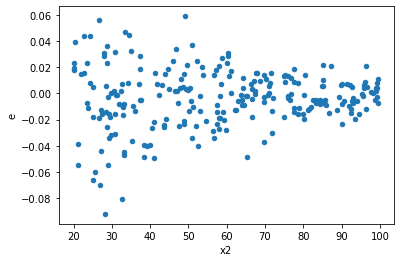

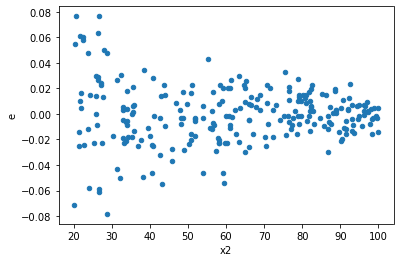

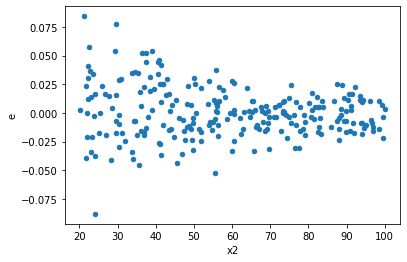

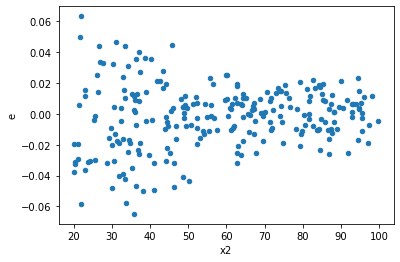

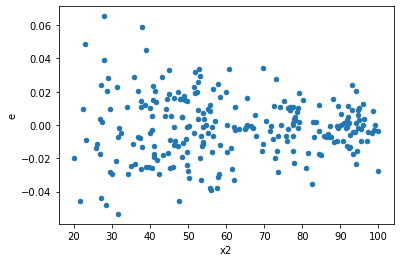

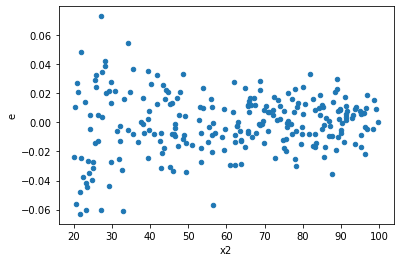

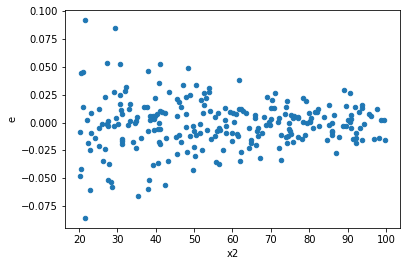

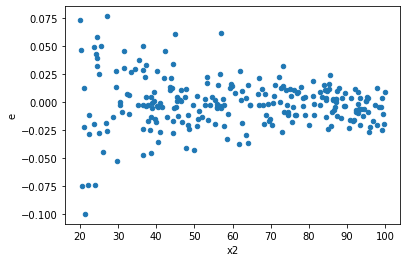

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,131.0,113.0,0.05760555415689511,0.05904954041224445,0.0004397370546327871,0.0005225623045331367,1.1883517639183598,0.3464836445009434,0.8267581777495283,0.1732418222504717,Reject005=1 : Homoscedasticity
2.0,134.0,110.0,0.0462729128740198,0.05806722749975251,0.00034532024532850597,0.0005278838863613865,1.5286792289261992,0.02160053868562284,0.9891997306571886,0.01080026934281142,Reject005=0 : Heteroscedasticity
5.0,126.0,118.0,0.023365113173448842,0.08028016842312165,0.00018543740613848286,0.0006803404103654377,3.6688412792905765,5.831113369936247e-12,0.9999999999970844,2.9155566849681236e-12,Reject005=0 : Heteroscedasticity
8.0,142.0,102.0,0.019775418679771273,0.10852892434728952,0.00013926351182937517,0.0010640090622283285,7.640257295334805,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,116.0,128.0,0.029567468182860518,0.08079149397398161,0.00025489196709362516,0.0006311835466717313,2.476278691198963,7.495430414117266e-07,0.9999996252284793,3.747715207058633e-07,Reject005=0 : Heteroscedasticity
10.0,131.0,113.0,0.028936039811570467,0.09193461205450634,0.0002208858000883242,0.0008135806376504986,3.683263647211262,8.424594355460613e-12,0.9999999999957877,4.2122971777303064e-12,Reject005=0 : Heteroscedasticity
12.0,122.0,122.0,0.025167657571750254,0.09517977469676282,0.00020629227517828078,0.0007801620876783838,3.781828897878781,1.3853362901272703e-12,0.9999999999993073,6.926681450636352e-13,Reject005=0 : Heteroscedasticity
13.0,128.0,116.0,0.02256219390383661,0.1019421762896278,0.00017626713987372352,0.0008788118645657569,4.985681762325815,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
16.0,119.0,125.0,0.02218965118735838,0.05999308358109515,0.00018646765703662503,0.0004799446686487612,2.5738762221616422,2.788746695792099e-07,0.9999998605626652,1.3943733478960496e-07,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,114.0,130.0,0.06744389008417441,0.06052474961307755,0.0005916130709138106,0.0004655749970236735,0.7869586050635129,0.19066584993182148,Reject005=1 : Homoscedasticity
1.0,131.0,113.0,0.05760555415689511,0.05904954041224445,0.0004397370546327871,0.0005225623045331367,1.1883517639183598,0.3464836445009434,Reject005=1 : Homoscedasticity
2.0,134.0,110.0,0.0462729128740198,0.05806722749975251,0.00034532024532850597,0.0005278838863613865,1.5286792289261992,0.02160053868562284,Reject005=0 : Heteroscedasticity
3.0,123.0,121.0,0.042289607313300726,0.03877243262115571,0.0003438179456365913,0.0003204333274475679,0.9319854635693144,0.6975053647597828,Reject005=1 : Homoscedasticity
4.0,118.0,126.0,0.054399079115069714,0.03510330486481419,0.00046100914504296366,0.0002785976576572555,0.6043213256242274,0.0059513052123768145,Reject005=0 : Heteroscedasticity
5.0,126.0,118.0,0.023365113173448842,0.08028016842312165,0.00018543740613848286,0.0006803404103654377,3.6688412792905765,5.831113369936247e-12,Reject005=0 : Heteroscedasticity
6.0,121.0,123.0,0.10235026106249957,0.07753854163110478,0.0008458699261363601,0.000630394647407356,0.7452619225828014,0.1060168286463535,Reject005=1 : Homoscedasticity
7.0,111.0,133.0,0.12164490448720504,0.02623378417949922,0.0010959000404252707,0.0001972464975902197,0.1799858475355809,2.7719822616945226e-18,Reject005=0 : Heteroscedasticity
8.0,142.0,102.0,0.019775418679771273,0.10852892434728952,0.00013926351182937517,0.0010640090622283285,7.640257295334805,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    576
Reject005=1 : Homoscedasticity      424
Name: Result_test, dtype: int64